In [1]:
from heeps.config import read_config, update_config
from heeps.pupil import create_stop
from heeps.util.img_processing import resize_img
import imutils
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# High Resolution Pupil: 20 micron per pixel; 45mm IMG ; 19.9mm LMS
conf = read_config()
npupil = {'L': update_config(**dict(read_config(), band='L'))['npupil'],
          'M': update_config(**dict(read_config(), band='M'))['npupil'],
         'HR': 1001}
print(npupil)

{'L': 285, 'M': 227, 'HR': 1001}


# SPP IMG-LM

In [3]:
band = 'HR'
stop_params = (0.0209, 0.0209, 0.0291)
diam_nominal = 38.542
AP_width = 0.07*diam_nominal
rot_angle = 10 #deg
# magnification factor for nhr (the super high res before dowscaling to npupil)
nhr_mag = 8 #9
i = 10
nhr = 2**i - 1
while nhr < nhr_mag*npupil[band]:
    i += 1
    nhr = 2**i - 1
print('npupil = %s, nhr = %s'%(npupil[band],nhr))
conf['npupil'] = nhr

npupil = 1001, nhr = 8191


shape before rot = (8191, 8191)
shape after rot = (1001, 1001)


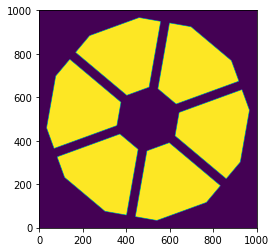

In [4]:
mask = create_stop(conf['diam_ext'], conf['diam_int'], *stop_params, 
                    circ_ext=False, circ_int=False, nhr=nhr, **conf)
print('shape before rot =', mask.shape)
mask_rot = imutils.rotate(mask, angle=rot_angle)
mask_rot = resize_img(mask_rot, npupil[band])
print('shape after rot =', mask_rot.shape)
P0 = np.sum(mask_rot)
plt.imshow(mask_rot, origin='lower');
fits.writeto('amp_SPP_IMG_stop_%s_%s_dRext=%s_dRint=%s_dRspi=%s.fits'%
    (band, npupil[band], *stop_params), mask_rot, overwrite=True)

shape before rot = (8191, 8191)
shape after rot = (1001, 1001)
throughtput loss = 1.56%


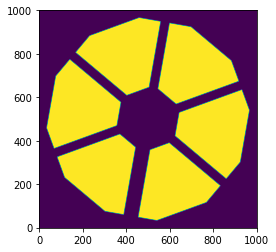

In [5]:
mask = create_stop(conf['diam_ext'], conf['diam_int'], *stop_params, 
                    circ_ext=False, circ_int=False, nhr=nhr,
                    AP_width=AP_width, AP_angles=[0], **conf)
print('shape before rot =', mask.shape)
mask_rot = imutils.rotate(mask, angle=rot_angle)
mask_rot = resize_img(mask_rot, npupil[band])
print('shape after rot =', mask_rot.shape)
print('throughtput loss = %.2f'%((1-np.sum(mask_rot)/P0)*100)+'%')
plt.imshow(mask_rot, origin='lower');
fits.writeto('amp_SPP_IMG_stop_%s_%s_dRext=%s_dRint=%s_dRspi=%s_AP1.fits'%
    (band, npupil[band], *stop_params), mask_rot, overwrite=True)

shape before rot = (8191, 8191)
shape after rot = (1001, 1001)
throughtput loss = 1.56%


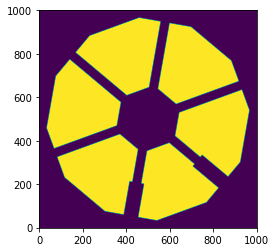

In [6]:
mask = create_stop(conf['diam_ext'], conf['diam_int'], *stop_params, 
                    circ_ext=False, circ_int=False, nhr=nhr,
                    AP_width=AP_width, AP_angles=[0, 60], AP_center=.796,
                    **conf)
print('shape before rot =', mask.shape)
mask_rot = imutils.rotate(mask, angle=rot_angle)
mask_rot = resize_img(mask_rot, npupil[band])
print('shape after rot =', mask_rot.shape)
print('throughtput loss = %.2f'%((1-np.sum(mask_rot)/P0)*100)+'%')
plt.imshow(mask_rot, origin='lower');
fits.writeto('amp_SPP_IMG_stop_%s_%s_dRext=%s_dRint=%s_dRspi=%s_AP2.fits'%
    (band, npupil[band], *stop_params), mask_rot, overwrite=True)